In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('drogen_14-24.csv', sep=',')

In [27]:
Deutschland=df[df['Country']=='DE']
Deutschland=Deutschland.reset_index(drop=True)
print(Deutschland)

     Year       Metabolite Country             City  Wednesday  Thursday  \
0    2016  methamphetamine      DE         Dortmund       6.11      4.08   
1    2016  methamphetamine      DE          Dresden     135.18    135.34   
2    2016  methamphetamine      DE           Dülmen       1.94      2.14   
3    2016  methamphetamine      DE         Munich G      13.20     13.10   
4    2016             MDMA      DE         Dortmund      20.88     19.60   
..    ...              ...     ...              ...        ...       ...   
244  2024          cocaine      DE        Magdeburg     174.74    186.10   
245  2024          cocaine      DE         Munich G     511.37    402.66   
246  2024          cocaine      DE        Nuremberg      71.81     80.20   
247  2024          cocaine      DE  Saarbrücken (2)     219.95    267.09   
248  2024          cocaine      DE        Stuttgart     361.61    406.06   

     Friday  Saturday  Sunday  Monday  Tuesday  Weekday mean  Weekend mean  \
0      3.

In [28]:
Staedte = ['Chemnitz', 'Dortmund', 'Dresden', 'Erfurt', 'Magdeburg', 'Munich', 'Nuremberg', 'Saarbrücken']

alle_staedte=[]

for stadt_name in Staedte:
    stadt_df = Deutschland[Deutschland['City'].str.startswith(stadt_name)]
    drogen_df = stadt_df[stadt_df['Metabolite'].isin(['cocaine', 'methamphetamine'])].copy()
    drogen_sum = drogen_df.groupby(['Year','City'])['Daily mean'].sum().reset_index()

    drogen_sum.to_csv(f'{stadt_name}.csv', sep=';', index=False)

    alle_staedte.append(drogen_sum)

gesamt_df = pd.concat(alle_staedte)
tabelle_fromat = gesamt_df.pivot(index='Year', columns='City', values='Daily mean')
tabelle_fromat.to_csv('alle_staedte.csv', sep=';') 



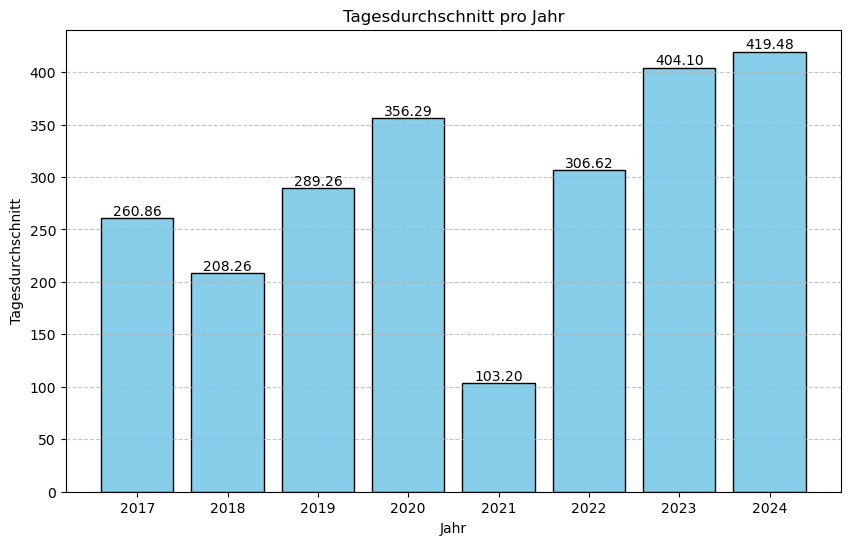

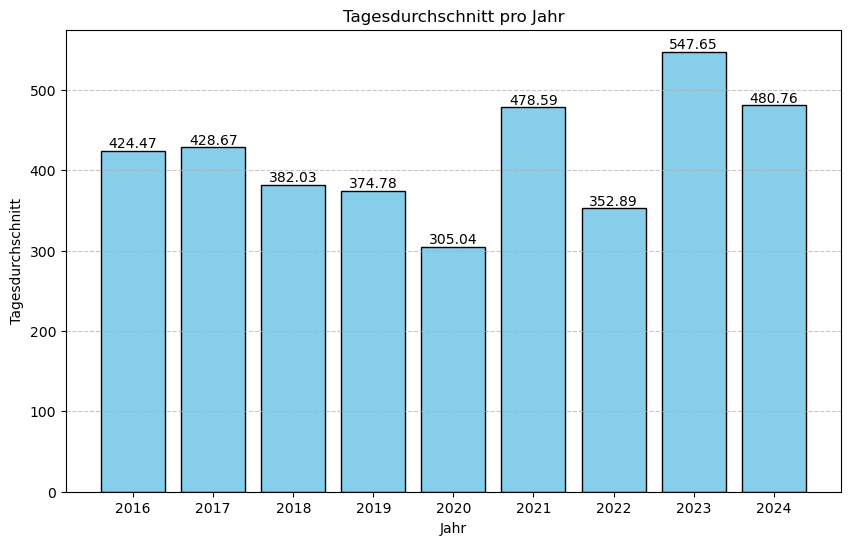

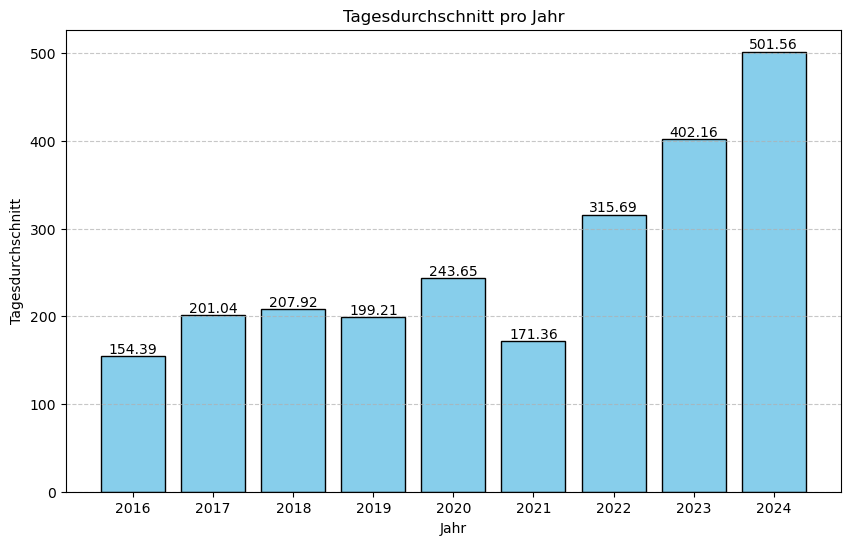

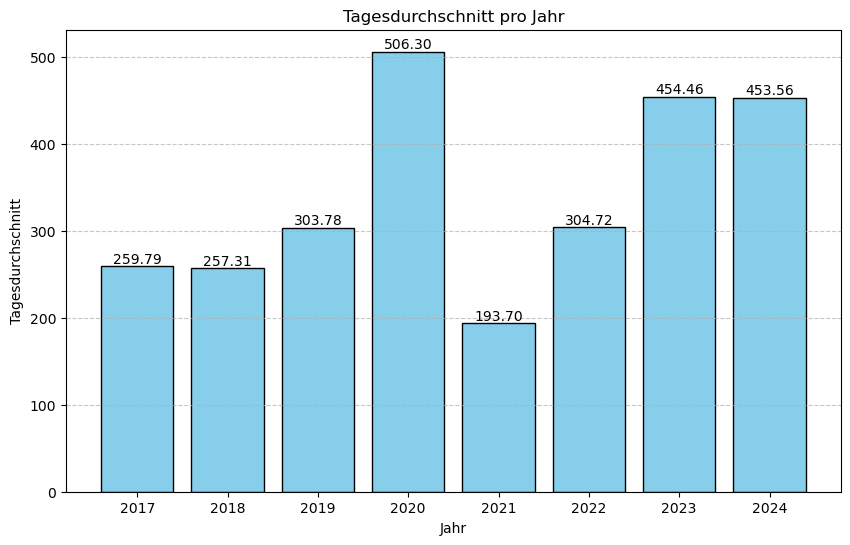

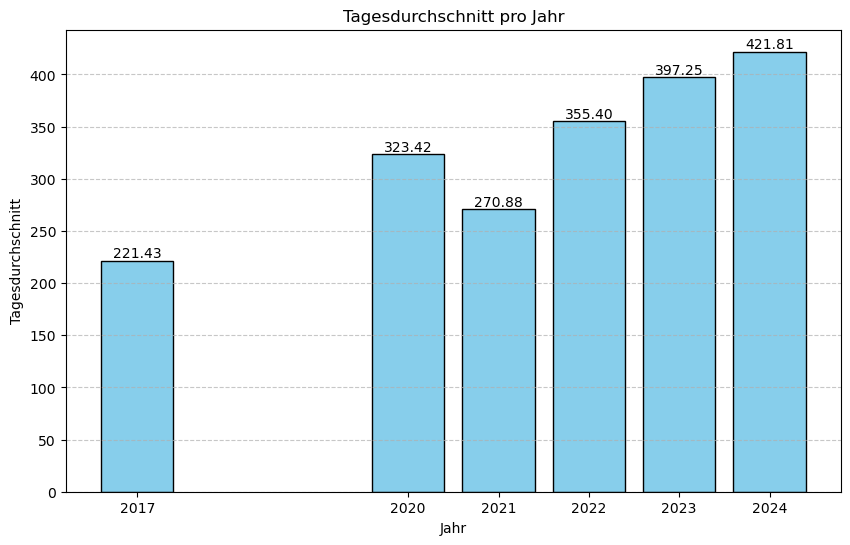

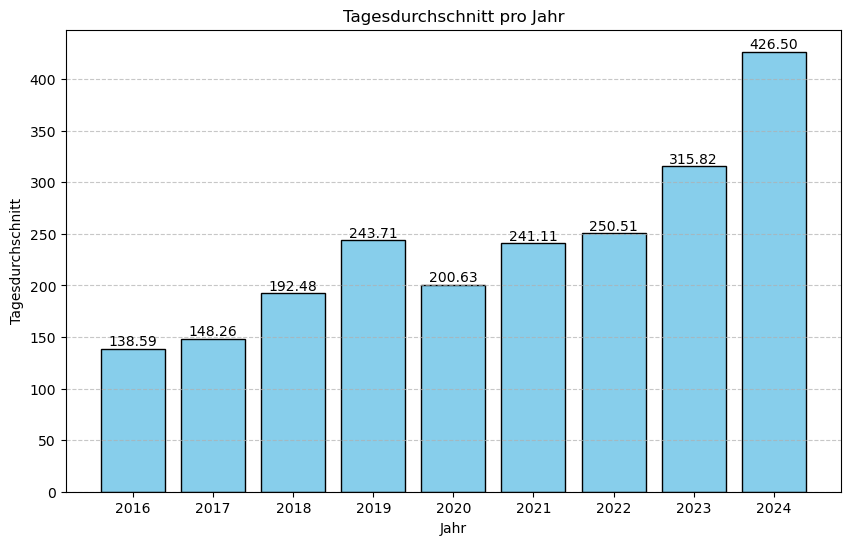

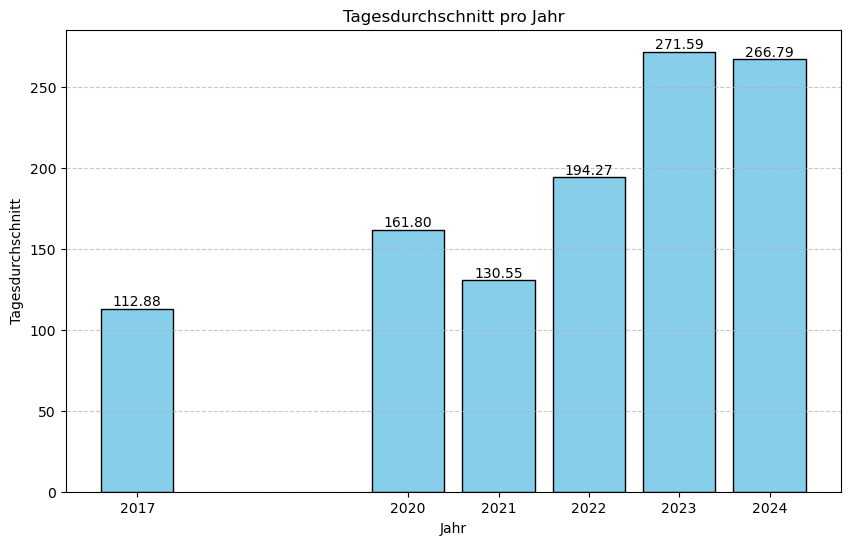

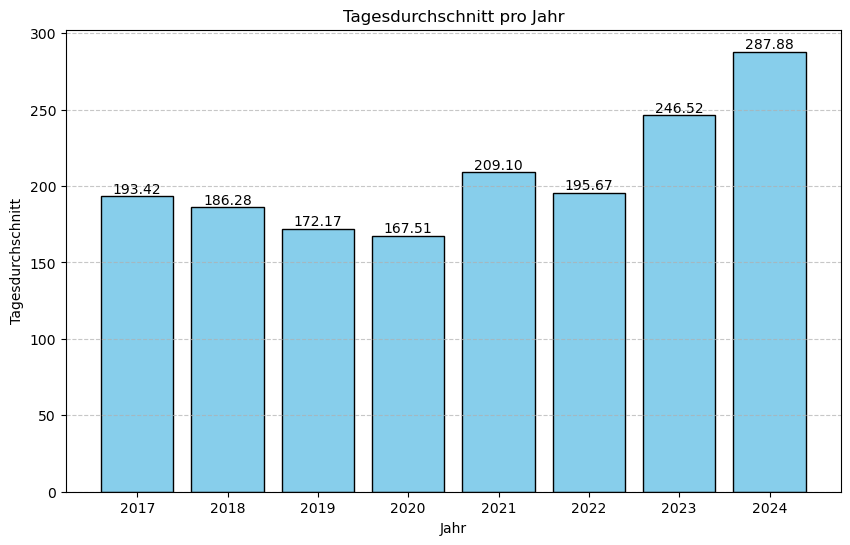

In [29]:
for stadt_name in Staedte:
    df = pd.read_csv(f'{stadt_name}.csv', sep=';')

    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Year'], df['Daily mean'], color='skyblue', edgecolor='black')

    # Beschriftungen hinzufügen
    plt.xlabel('Jahr')
    plt.ylabel('Tagesdurchschnitt')
    plt.title('Tagesdurchschnitt pro Jahr')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(df['Year'])

    # Werte über den Balken anzeigen
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
        plt.savefig(f'{stadt_name}Diagramm.png', dpi=300, bbox_inches='tight')

    plt.show()